# Deep Learning

## Introduction

One of the machine learning technique that learns features directly from data. With the amount of data increasing, machine learning techniques are insufficient in terms of performance and deep learning gives better performance and accuracy.

Deep learning is used in speech recognition, image classification, natural language processing or recommendation systems.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

We will be using the "sign language digit datatset", there are $2062$ sign language digit images, where digits are from $0$ to $9$, so there are only $10$ unique signs. 

At the beginning, we will only make use of $0$ and $1$, just for simplicity. 

In this data, sign $0$ is between indexes $204$ and $408$, number of zero signs are 205, and $1$ is between $822$ and $1027$, and they are $206$ in number, so we will be using $205$ samples from each. 

$X$ is the image array, (zero and one signs), while $Y$ is the label array (0 and 1)

(-0.5, 63.5, 63.5, -0.5)

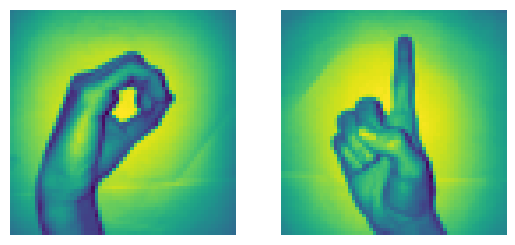

In [6]:

# Load dataset
x_l = np.load('sign_language_dataset/X.npy')
y_l = np.load('sign_language_dataset/Y.npy')

img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

In order to create an image array, we have to concatenate zero sign and one sign arrays, then create a label array 0 for zero sign images and 1 for one sign images.

In [7]:
# join a sequence of arrays along a new axis.
X = np.concatenate((x_l[204:409], x_l[822:1027]), axis = 0)

z = np.zeros(205)
o = np.ones(205)

Y = np.concatenate((z,o), axis = 0 ).reshape(X.shape[0],1)

print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


**What do these dimensions means?**

<li> The shape of X is (410,64,64). which can be seen as:
    410 number of images (in total)
    64 is the size of image, i.e 64x64

<li> The shape of Y is (410,1)
    410 means the 410 labels that we have, 0 and 1s

Now, we have to do the test train split of 75-15, make sure to use the same seed while randomizing, so that if we call this test train split again and again, we always create the same distribution.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

print("Number of train: ", number_of_train)
print("Number of test: ", number_of_test)

Number of train:  348
Number of test:  62


Now, since our X dataset is images, which is a 3 dimensional input array, we need to flatten it to make use of it as an input for our first deep learning model. Our labels Y are alreast 2D

In [9]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2]) 
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])

print("X train flatten", X_train_flatten.shape)
print("X test flatten", X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


As you can see, we have 348 images and each image has 4096 pixels in image train array.
Also, we have 62 images and each image has 4096 pixels in image test array.

**Side Note**

How does this flattening works?

In [10]:
import numpy as np

# Original 3D dataset: 5 images, each 3x3
X_train_example = np.array([
    [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]],
    
    [[10, 11, 12],
     [13, 14, 15],
     [16, 17, 18]],
    
    [[19, 20, 21],
     [22, 23, 24],
     [25, 26, 27]],
    
    [[28, 29, 30],
     [31, 32, 33],
     [34, 35, 36]],
    
    [[37, 38, 39],
     [40, 41, 42],
     [43, 44, 45]]
])

print("Original shape of X_train:", X_train_example.shape)

Original shape of X_train: (5, 3, 3)


This output means you have 5 images, each with a shape of 3x3 pixels.

### Flatten the Images

In [11]:
number_of_train_example = X_train_example.shape[0]  # 5 images
X_train_flatten_example = X_train_example.reshape(number_of_train_example, X_train_example.shape[1] * X_train_example.shape[2])

print("Flattened shape of X_train:", X_train_flatten_example.shape)
print("X_train_flatten:\n", X_train_flatten_example)

Flattened shape of X_train: (5, 9)
X_train_flatten:
 [[ 1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18]
 [19 20 21 22 23 24 25 26 27]
 [28 29 30 31 32 33 34 35 36]
 [37 38 39 40 41 42 43 44 45]]


### Explanation of the Flattened Array

The shape `(5, 9)` indicates:
- There are 5 rows, one for each image.
- Each row has 9 values, representing each pixel in the original 3x3 image (flattened).

Each row in `X_train_flatten` now contains a flattened version of the original 3x3 image. Here’s what each row represents:

- **First image:** `[1, 2, 3, 4, 5, 6, 7, 8, 9]`
- **Second image:** `[10, 11, 12, 13, 14, 15, 16, 17, 18]`
- **Third image:** `[19, 20, 21, 22, 23, 24, 25, 26, 27]`
- **Fourth image:** `[28, 29, 30, 31, 32, 33, 34, 35, 36]`
- **Fifth image:** `[37, 38, 39, 40, 41, 42, 43, 44, 45]`

### Why This Works

Flattening an image essentially "unrolls" each 2D matrix (image) into a single row. For a 3x3 image, we take each row and lay it out end-to-end:
- The first row `[1, 2, 3]` becomes the first three elements in the flattened row.
- The second row `[4, 5, 6]` follows.
- The third row `[7, 8, 9]` completes the row.

This process is repeated for each image, resulting in a 2D array where each row represents a flattened version of the original 2D image.

---

### Recap

- **Original shape:** `(5, 3, 3)` — 5 images, each 3x3 pixels.
- **Flattened shape:** `(5, 9)` — 5 rows, each representing a flattened 3x3 image with 9 pixels.

This code enables you to transform your images into a format suitable for feeding into certain machine learning models.

**back to the original code**

In [12]:
# let's take a transpose of the flattened dataset
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


### Why Transpose the Data?

Transposing `X_train`, `X_test`, `y_train`, and `y_test` is typically done to adjust the data’s shape to match the expected input format for certain machine learning models, especially in deep learning frameworks.

---

#### 1. Understanding the Shape of Flattened Data

After flattening, suppose `X_train_flatten` has a shape of `(number_of_train, height * width)`. For example:
- `X_train_flatten.shape` might be `(1000, 4096)` for 1000 images, each flattened into a vector of size 4096.

Most deep learning frameworks expect data in the shape **(features, samples)** rather than **(samples, features)**, particularly for specific types of models or when working directly with linear algebra operations.

---

#### 2. Why Transpose?

When we transpose `X_train` and `X_test`, we change their shape from:
- `(samples, features)` to `(features, samples)`

Similarly, for the labels `y_train` and `y_test` (assuming they are one-dimensional vectors of shape `(samples,)`), transposing converts them into a 2D shape `(1, samples)`, which is often required for certain models that use vectorized operations.

---

#### 3. Example

Suppose the data shapes are as follows:
- `X_train_flatten.shape` = `(1000, 4096)`
- `y_train.shape` = `(1000,)`

After transposing:
- `X_train_flatten.T` shape = `(4096, 1000)`
- `y_train.T` shape = `(1, 1000)`

This new shape makes it easier to perform operations on a **feature-by-feature basis across samples**, which can be beneficial for vectorized operations in machine learning libraries.

---

#### 4. Practical Reasons

The need for transposing usually arises in these situations:
- **Matrix Multiplications**: Some models or linear algebra operations expect the features to be along the rows rather than the columns.
- **Framework Expectations**: Certain libraries or algorithms (such as neural network layers in some frameworks) may expect input data in a `(features, samples)` format.
- **Batch Processing**: Transposed data can facilitate efficient calculations, especially for batch processing and gradient calculations during backpropagation.

---

### Summary

Transposing the data helps reformat it to align with the model’s input requirements or the framework's expectations, enabling efficient calculations, particularly for batch processing and vectorized operations.

## Computation Graph

They are a nice way to thing about mathematical expressions, for example, if we have
$$ c = \sqrt{a^2 + b^2} $$

It's computation graph is:

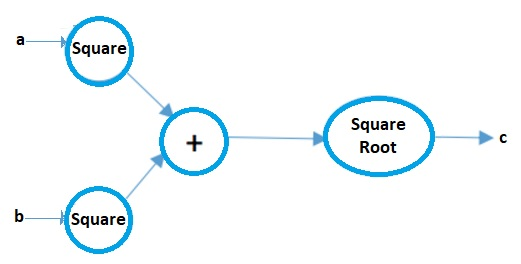

Now, a computational graph of logistic regression looks like:

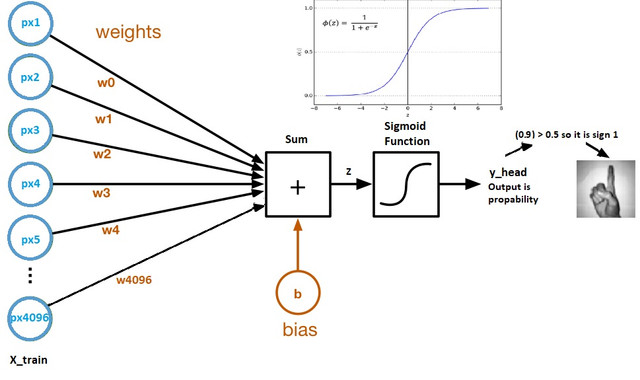

# Explanation of the Logistic Regression Computational Graph

Logistic regression is a binary classification algorithm used to predict the probability of a target variable belonging to a particular class. The computational graph in the image provides a visual representation of how logistic regression works.

---

### 1. Input Data (`X_train`)

- **`X_train`** represents the input data, which in this example consists of **4096 features** (labeled `px1`, `px2`, ..., `px4096`).
- Each feature in `X_train` corresponds to a pixel in an image (flattened into a single row), where **4096** represents the total number of pixels (e.g., for a 64x64 grayscale image).
- Each feature is a numeric value (pixel intensity) that is input into the model.

---

### 2. Weights (`w0`, `w1`, ..., `w4096`)

- Each input feature (`px1`, `px2`, ..., `px4096`) is associated with a weight (`w0`, `w1`, ..., `w4096`).
- These **weights** are parameters learned by the logistic regression model during training.
- Each weight indicates the importance or influence of a corresponding feature on the final prediction.

---

### 3. Bias (`b`)

- The **bias term `b`** is an additional parameter that allows the model to adjust the output independently of the input values.
- It essentially shifts the decision boundary of the model, enabling it to fit the data better.

---

### 4. Summation (`z`)

- The input data and weights are combined in a linear form:
  
  $$
  z = w_0 \cdot px1 + w_1 \cdot px2 + w_2 \cdot px3 + \dots + w_{4096} \cdot px4096 + b
  $$

- This summation computes the **weighted sum** of the input features, plus the bias.
- The result, `z`, is a single scalar value that represents the linear combination of inputs.

---

### 5. Sigmoid Activation Function

- After computing `z`, the value is passed through the **sigmoid function**, which is defined as:

  $$
  \sigma(z) = \frac{1}{1 + e^{-z}}
  $$

- The sigmoid function **squashes the output** into a range between 0 and 1, making it interpretable as a probability.
- This output, often denoted as **`y_hat`** (or the predicted probability), represents the probability that the input belongs to the positive class (e.g., sign language "1" in this case).

---

### 6. Output Probability (`y_head` or `ŷ`)

- The sigmoid function’s output, `ŷ` (or `y_head`), represents the **probability of the positive class**.
- For example, if `ŷ = 0.9`, it implies a 90% probability that the input belongs to class "1".

---

### 7. Thresholding and Prediction

- In binary classification, a threshold (typically 0.5) is applied to `ŷ` to make a final prediction:
  - If `ŷ > 0.5`, the prediction is class `1`.
  - If `ŷ <= 0.5`, the prediction is class `0`.
- In this example, `ŷ = 0.9`, which is greater than 0.5, so the model predicts the input is of class `1`.

---

### Summary of Steps

1. **Input Data**: Each pixel (feature) of the image is fed into the model.
2. **Weights and Bias**: The model applies learned weights and bias to each feature.
3. **Summation (`z`)**: Computes the weighted sum of all features.
4. **Sigmoid Activation**: Transforms `z` into a probability between 0 and 1.
5. **Thresholding**: Compares `ŷ` to 0.5 to make a binary prediction.

This computational graph demonstrates how logistic regression works in a structured way, transforming raw pixel data into a probabilistic prediction, ultimately used for classification.

# Why Use the Sigmoid Function in Logistic Regression?

The sigmoid function plays a crucial role in logistic regression, as it transforms the output of a linear equation into a probability, making it suitable for binary classification tasks. Here’s a detailed breakdown of why the sigmoid function is used:

---

### 1. Mapping Output to Probability

- Logistic regression is used for **binary classification**, where the goal is to predict the probability that an input belongs to a certain class (e.g., class `1` or class `0`).
- The sigmoid function **maps any real-valued number** (the output of the linear equation) into a range between **0 and 1**, which can be interpreted as a probability.
  
  $$
  \sigma(z) = \frac{1}{1 + e^{-z}}
  $$

- If the output of the linear equation `z` is very large (positive or negative), the sigmoid function will bring it within the probability range of `[0, 1]`, where:
  - Values close to 1 indicate a high probability of belonging to the positive class.
  - Values close to 0 indicate a low probability of belonging to the positive class.

---

### 2. Smooth and Differentiable

- The sigmoid function is **smooth and differentiable**, which means it has a continuous gradient.
- This smooth gradient is essential for **gradient-based optimization** algorithms, such as gradient descent, which are used to find optimal weights and bias values in logistic regression.
- The differentiable nature of the sigmoid function allows us to compute gradients, enabling efficient updates to the weights and bias during training.

---

### 3. Non-linear Transformation

- Logistic regression applies a **linear transformation** to the input features (using weights and bias), but a linear model alone cannot output probabilities.
- The sigmoid function introduces **non-linearity** to the model, allowing it to produce probabilities rather than unrestricted real numbers.
- This non-linearity is crucial for classification tasks, as it compresses the output of the linear combination into a bounded range, `[0, 1]`, which can be interpreted as a probability.

---

### 4. Decision Boundary

- By applying a threshold (typically 0.5) to the sigmoid output, we can classify the input as one of two classes:
  - If `ŷ > 0.5`, classify as class `1` (positive).
  - If `ŷ <= 0.5`, classify as class `0` (negative).
- The sigmoid function creates a **smooth decision boundary** that separates the two classes, allowing logistic regression to work well for linearly separable data.

---

### 5. Interpretability

- The output of the sigmoid function can be **directly interpreted as a probability**, making logistic regression a probabilistic model.
- For example, if `ŷ = 0.9`, we can interpret this as a 90% confidence that the input belongs to class `1`.
- This probabilistic interpretation is valuable in many applications, such as medical diagnosis or spam detection, where understanding the confidence of the prediction is essential.

---

### Summary: Benefits of Using the Sigmoid Function

- **Maps outputs to probabilities**: Outputs a value between 0 and 1, making it interpretable as a probability.
- **Smooth and differentiable**: Facilitates gradient-based optimization in training.
- **Non-linear transformation**: Enables logistic regression to output probabilities instead of raw linear values.
- **Enables decision boundary**: Allows thresholding to separate classes effectively.
- **Interpretability**: Makes the output directly understandable as the probability of belonging to a specific class.

In short, the sigmoid function is used in logistic regression to convert the linear output into a probability that can be thresholded for binary classification. This makes logistic regression a powerful yet simple model for classification tasks.

## Initializing Parameters

### Initializing Parameters in Logistic Regression

In logistic regression, our input consists of images with **4096 pixels each** (as given in `x_train`). Each pixel has an associated **weight** that indicates its influence on the final prediction. Before training the model, we need to initialize these weights and the bias term.

#### 1. Why Initialize Weights?

The first step in logistic regression is to **multiply each pixel's value by its corresponding weight** and then sum the results to get a linear combination of the input features. However, since the model hasn’t learned any patterns yet, the weights need to be initialized with some initial values. Proper weight initialization is crucial, as it sets the foundation for learning. Starting with poor values can lead to slower or suboptimal learning.

#### 2. Initial Values for Weights

For this example, we’ll initialize all weights to a small value of **0.01**. Initializing weights with small, non-zero values helps prevent the model from getting "stuck" with zero gradients and enables it to start learning effectively. (There are more advanced initialization techniques, which we’ll discuss in detail when covering Artificial Neural Networks (ANNs), but for now, setting weights to 0.01 will suffice.)

#### 3. Shape of the Weight Array

As we can see from the computational graph of logistic regression, there are **4096 weights** — one for each pixel in an image. Since each weight is applied to a single pixel, the weight array has a shape of **(4096, 1)**. This shape allows each weight to align with its corresponding pixel in the input data.

#### 4. Initializing the Bias

In addition to weights, we also initialize a **bias term (`b`)**. The bias term allows the model to shift the decision boundary independently of the input values, giving it more flexibility. For logistic regression, we typically initialize the bias to **0**.

---

### Code for Parameter Initialization

To keep the code modular and reusable, we’ll define a function to initialize these parameters. This function will be useful later when we expand into more complex models, such as Artificial Neural Networks (ANNs).

```python
def initialize_parameters(dim):
    """
    Initializes weights and bias for logistic regression.
    
    Arguments:
    dim -- size of the weight vector (number of features)
    
    Returns:
    w -- initialized weight vector of shape (dim, 1)
    b -- initialized bias, set to 0
    """
    w = np.full((dim, 1), 0.01)  # Initialize weights with 0.01
    b = 0                        # Initialize bias to 0
    return w, b

# Example usage
dim = 4096  # Number of pixels in each image
w, b = initialize_parameters(dim)
print("Shape of weights:", w.shape)
print("Bias:", b)
```

#### Explanation of the Code

- **Function Name**: `initialize_parameters`  
  This function is designed to initialize the weight vector (`w`) and the bias (`b`) for logistic regression. By using a function, we keep the initialization code modular and reusable for future applications.

- **Parameter (`dim`)**:  
  The function takes `dim` as an argument, which represents the number of features (or pixels) in each image. In our case, `dim = 4096`, since each image has 4096 pixels.

- **Weight Initialization**:  
  Inside the function, `np.full((dim, 1), 0.01)` creates a weight vector `w` with the specified shape `(dim, 1)`, where each element is set to the initial value **0.01**. This results in a weight vector with 4096 rows and 1 column, corresponding to each pixel. Initializing all weights with a small, non-zero value (0.01) provides a good starting point for learning and helps the model avoid issues that can arise if weights start at zero.

- **Bias Initialization**:  
  The bias `b` is initialized to **0**. Unlike weights, bias is a single scalar value that adjusts the model's output independently of the input features. Initializing it to zero is common practice in logistic regression, as it will be updated during training.

- **Returning Values**:  
  The function returns `w` and `b` as outputs, providing the initialized parameters to use in the model.

- **Example Usage**:  
  After defining the function, we call `initialize_parameters(4096)` to initialize weights and bias for images with 4096 pixels. The output shows:
  - `w` with a shape of `(4096, 1)`, meaning there’s a weight for each pixel.
  - `b` initialized to `0`.

This initialization setup allows the logistic regression model to start with appropriate initial values for training.

In [15]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension, 1), 0.01)
    b = 0.0
    return w, b

### Forward Propagation in Logistic Regression

**Forward propagation** in logistic regression involves all the steps from processing the input pixels to calculating the cost (error) for a single training iteration. Let’s break down each step:

---

#### 1. Linear Combination (`z`)

The first step in forward propagation is to calculate a **linear combination** of the input features and their corresponding weights, plus the bias term. This is given by the equation:

\[
z = w^T x + b
\]

where:
- `x` is the input vector (flattened pixels of an image).
- `w` is the weight vector.
- `b` is the bias term.
- `w^T` represents the transpose of `w`, which allows us to perform matrix multiplication with `x` and get a scalar output.

Since we already have values for `x`, `w`, and `b` from the input data and parameter initialization, calculating `z` is straightforward.

---

#### 2. Sigmoid Activation Function

After calculating `z`, we pass it through the **sigmoid function** to convert it into a probability. The sigmoid function, defined as:

\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

squashes the output to a value between **0 and 1**, which represents the predicted probability (`y_head`) of the input belonging to the positive class (e.g., class `1`). This probability, `y_head`, is our model’s prediction for the given input.

If you get confused by the steps, refer back to the computation graph for logistic regression. The sigmoid function is visually depicted there to help you understand how it transforms `z` into a probability.

---

#### 3. Loss (Error) Calculation

Next, we calculate the **loss (error)** for a single training example. The loss function measures how far off the prediction (`y_head`) is from the actual label `y`. In logistic regression, we use the **binary cross-entropy loss**:

\[
\text{Loss} = - \left( y \cdot \log(y\_head) + (1 - y) \cdot \log(1 - y\_head) \right)
\]

where:
- `y` is the true label (0 or 1) for the input.
- `y_head` is the predicted probability of class `1`.

This loss function penalizes incorrect predictions more heavily, making it ideal for binary classification tasks.

---

#### 4. Cost Function (Summing All Losses)

The **cost function** is the average of the loss values across all training examples. It is computed as:

\[
\text{Cost} = \frac{1}{m} \sum_{i=1}^{m} \text{Loss}(y_i, y\_head_i)
\]

where:
- `m` is the total number of training examples.
- `Loss(y_i, y_head_i)` is the loss for each individual example.

Minimizing this cost function during training will improve the model’s accuracy by adjusting the weights and bias to reduce prediction errors.

---

### Code for Forward Propagation

Let’s start by calculating `z`, then define a function for the sigmoid activation, which takes `z` as an input parameter and returns `y_head` (the probability).

```python
def sigmoid(z):
    """
    Computes the sigmoid of z.

    Arguments:
    z -- A scalar or numpy array of any size

    Returns:
    s -- sigmoid(z), output between 0 and 1
    """
    s = 1 / (1 + np.exp(-z))
    return s

# Example calculation of z
z = np.dot(w.T, x) + b  # w.T represents the transpose of w
y_head = sigmoid(z)     # y_head is the predicted probability
```

#### Explanation of the Code

- **Sigmoid Function**:  
  The `sigmoid` function calculates the sigmoid of `z`, which is a mathematical operation that maps any input to a value between 0 and 1. This output represents the probability (`y_head`) that the input belongs to the positive class. The sigmoid function is defined as:

  $$
  \sigma(z) = \frac{1}{1 + e^{-z}}
  $$
  In the code, `s = 1 / (1 + np.exp(-z))` implements this formula, where `np.exp(-z)` calculates the exponential of `-z` for each element in `z`.

- **Calculation of `z`**:  
  The variable `z` is calculated using the expression `np.dot(w.T, x) + b`. Here:
  - `w.T` is the transpose of the weight vector `w`. Transposing `w` (which has shape `(4096, 1)`) makes it compatible with `x` for matrix multiplication.
  - `np.dot(w.T, x)` performs the dot product between `w.T` and `x`, resulting in a scalar value `z` (since `x` is also a vector of shape `(4096, 1)`).
  - Adding `b` incorporates the bias term into the calculation, which helps adjust the model's decision boundary.

- **Predicted Probability (`y_head`)**:  
  After calculating `z`, we pass it into the `sigmoid` function to obtain `y_head`, the predicted probability that the input belongs to class `1`. This probability (`y_head`) will be used to calculate the loss and cost in the training process.

By organizing the code this way, we separate the calculation of `z` and the sigmoid function, which makes it modular and easier to understand. This modular approach will also make it easier to reuse the sigmoid function in future parts of the model.

In [16]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [17]:
y_head = sigmoid(0)
print(y_head)

0.5
